In [1]:
import os
import pandas as pd
import numpy as np
import ants
from matplotlib import pyplot as plt

In [2]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    roi_data = im.numpy()[roi.numpy()==1].mean()
    return roi_data

In [3]:
indir = '../Data/StudyForrest/fmriprep/'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
print(len(subs))

14


In [4]:
ofdir_root = '../Data/StudyForrest/ensembles_last_CVAE'
analysis_name = 'refactored-forrest-v3'
ofdir = os.path.join(ofdir_root,analysis_name)

In [5]:
fn_temp = 'contrast_face_{s}_R{r}_deepcor.nii.gz'

In [6]:
rvec=[1,2,3,4]

In [7]:
s=0
r=1
kind = 'preproc'

In [8]:
roi_fn_temp = '../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'
res = np.zeros((len(rvec),len(subs),3))
kinds = ['preproc','compcor','deepcor']
for s in range(len(subs)):
    for r in rvec:
        for k in range(3):
            kind = kinds[k]
            im_fn = os.path.join(ofdir,'contrast_face_{s}_R{r}_{kind}.nii.gz'.format(s=s,r=r,kind=kind))
            roi_fn = roi_fn_temp.format(sub=subs[s])
            res[r-1,s,k] = get_roi_data(im_fn,roi_fn)
np.save('../Data/betas_forrest_face.npy',res)

In [9]:
roi_fn_temp = '../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'
res = np.zeros((len(rvec),len(subs),3))
kinds = ['preproc','compcor','deepcor']
for s in range(len(subs)):
    for r in rvec:
        for k in range(3):
            kind = kinds[k]
            im_fn = os.path.join(ofdir,'contrast_place_S{s}_R{r}_{kind}.nii.gz'.format(s=s,r=r,kind=kind))
            roi_fn = roi_fn_temp.format(sub=subs[s])
            res[r-1,s,k] = get_roi_data(im_fn,roi_fn)
            
np.save('../Data/betas_forrest_place.npy',res)

In [10]:
mot = np.zeros((len(rvec),len(subs)))
for s in range(len(subs)):
    for r in rvec:
        sub = subs[s]
        conf_fn = os.path.join(indir,f'{sub}/ses-localizer/func/{sub}_ses-localizer_task-objectcategories_run-{r}_bold_confounds.tsv')
        df = pd.read_csv(conf_fn,delimiter='\t')
        fd = df['FramewiseDisplacement'].values[1::]
        mot[r-1,s]=fd.mean()

In [11]:
np.save('../Data/mot_forrest.npy',mot)

In [12]:
mot_things = np.load('../Data/mot_things.npy')
mot_forrest = np.load('../Data/mot_forrest.npy')
mot_ABCD = np.load('../Data/mot_ABCD.npy')[:,0:33]

In [13]:
betas_face_things = np.load('../Data/betas_things_face.npy')
betas_face_forrest = np.load('../Data/betas_forrest_face.npy')
betas_face_ABCD = np.load('../Data/betas_ABCD_face.npy')

In [14]:
regbetas_face_things = np.load('../Data/betas_things_face-reg.npy')
regbetas_face_ABCD = np.load('../Data/betas_ABCD_face-reg.npy')

In [15]:
diff_things = betas_face_things[:,:,2]-betas_face_things[:,:,1]
diff_forrest = betas_face_forrest[:,:,2]-betas_face_forrest[:,:,1]
diff_ABCD = betas_face_ABCD[:,:,2]-betas_face_ABCD[:,:,1]

In [16]:
diff_things_reg = regbetas_face_things[:,:,2]-regbetas_face_things[:,:,0]
diff_ABCD_reg = regbetas_face_ABCD[:,:,2]-regbetas_face_ABCD[:,:,0]

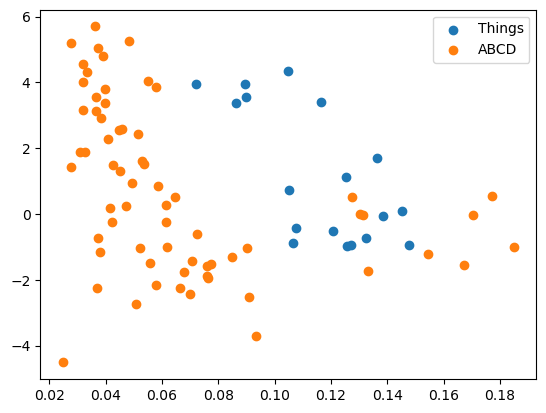

In [49]:
#plt.scatter(mot_forrest.flatten(),diff_forrest.flatten())
plt.scatter(mot_things.flatten(),diff_things.flatten())
plt.scatter(mot_ABCD.flatten(),diff_ABCD.flatten())
#plt.legend(['Forrest','Things','ABCD'])
plt.legend(['Things','ABCD'])

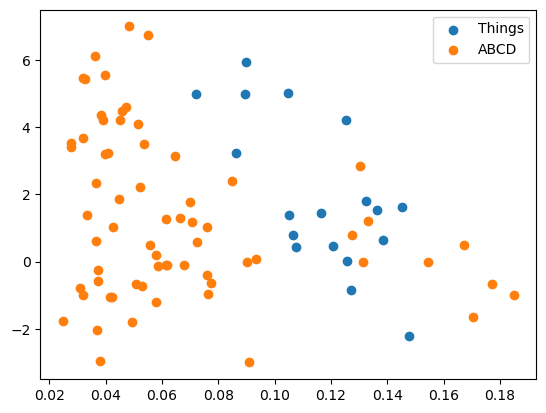

In [50]:
plt.scatter(mot_things.flatten(),diff_things_reg.flatten())
plt.scatter(mot_ABCD.flatten(),diff_ABCD_reg.flatten())
#plt.legend(['Forrest','Things','ABCD'])
plt.legend(['Things','ABCD'])

In [18]:
# np.corrcoef(np.hstack((mot_forrest.flatten(),mot_things.flatten(),mot_ABCD.flatten(),)),
# np.hstack((diff_forrest.flatten(),diff_things.flatten(),diff_ABCD.flatten(),)))

In [19]:
print(f'{(diff_things_reg<-1).sum()}/{(diff_things<-1).sum()}')
print(f'{(diff_ABCD_reg<-1).sum()}/{(diff_ABCD<-1).sum()}')

1/0
9/23


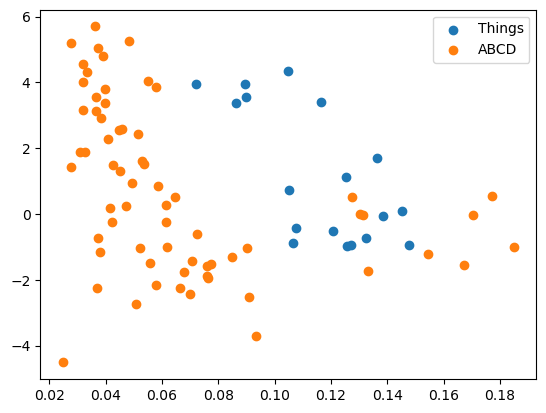

In [20]:
plt.scatter(mot_things.flatten(),diff_things.flatten())
plt.scatter(mot_ABCD.flatten(),diff_ABCD.flatten())
plt.legend(['Things','ABCD'])

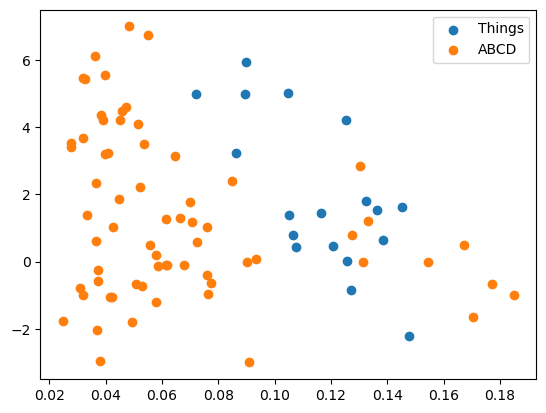

In [88]:
plt.scatter(mot_things.flatten(),diff_things_reg.flatten())
plt.scatter(mot_ABCD.flatten(),diff_ABCD_reg.flatten())
plt.legend(['Things','ABCD'])

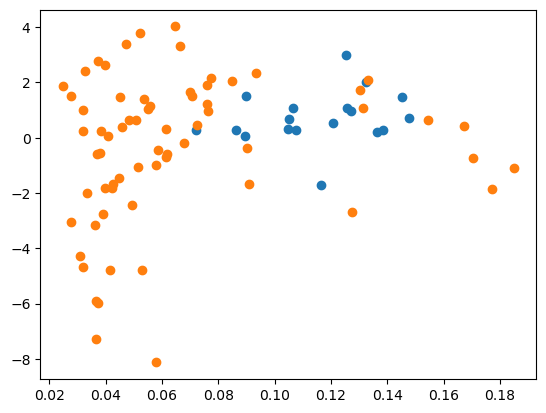

In [127]:
plt.scatter(mot_things.flatten(),diff_things_reg.flatten()-diff_things.flatten())
plt.scatter(mot_ABCD.flatten(),diff_ABCD_reg.flatten()-diff_ABCD.flatten())

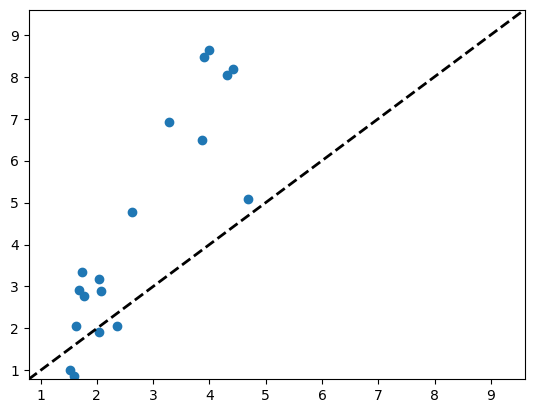

In [44]:
v1 = betas_face_forrest[:,:,1].flatten()
v2 = betas_face_forrest[:,:,2].flatten()

v1 = regbetas_face_ABCD[:,:,1].flatten()
v2 = regbetas_face_ABCD[:,:,2].flatten()

v1 = regbetas_face_things[:,:,1].flatten()
v2 = regbetas_face_things[:,:,2].flatten()

vmin=min((v1.min(),v2.min()))-abs(vmin)*.1
vmax=max((v1.max(),v2.max()))+abs(vmax)*.1
plt.scatter(v1,v2)
plt.xlim(vmin,vmax)
plt.ylim(vmin,vmax)
plt.plot([vmin, vmax], [vmin, vmax], 'k--', lw=2, label='x = y')
